In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import  keras

import wordcloud

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

2023-07-06 10:31:01.746493: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-06 10:31:01.786882: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-06 10:31:01.787716: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-06 10:31:04.380598: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/brijesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
df1 = pd.read_csv("./datasets/sms.csv",delimiter=',')
df2 = pd.read_csv("datasets/yt.csv",delimiter=',')
df3 = pd.read_csv("datasets/my-collection.csv",delimiter=',')
df4 = pd.read_csv("datasets/spam-word.csv",delimiter=',')

df = pd.concat([df1,df2,df3,df4],ignore_index=1)


df = df[["Comment", "Spam"]]

df = df.drop_duplicates()
df = df.dropna()

# df["Comment"] = df["Comment"].map(lambda  text :  re.compile("\"").sub("", text) )
# df["Comment"] = df["Comment"].map(lambda  text :  re.compile(r"https?://\S+|www\.\S+").sub(r"[URL]", text) )
# df["Comment"] = df["Comment"].map(lambda  text :  text.translate(str.maketrans("", "", string.punctuation)))
# df["Comment"] = df["Comment"].map(lambda  text :  " ".join([word.lower() for word in text.split() if word.lower() not in set(stopwords.words("english"))]) )

df["Comment"] = df["Comment"].map(lambda  text :  text.lower())

# d = df["Comment"].values.reshape(-1, 1)


In [10]:
random = RandomOverSampler()
X , y =  random.fit_resample(df["Comment"].values.reshape(-1, 1),df["Spam"].values)

In [4]:
X= df["Comment"]
y=df["Spam"]

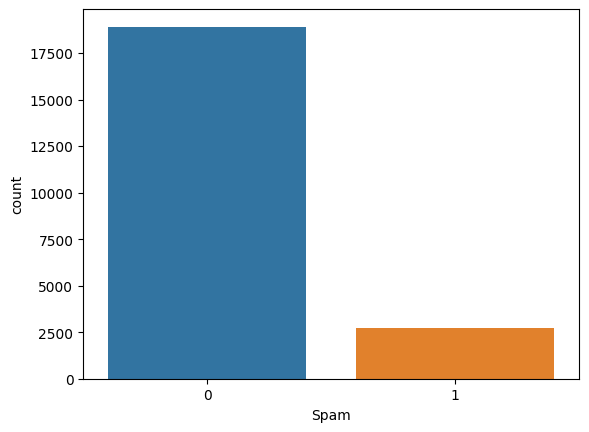

In [13]:
data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(df, columns=df.columns)

sns.countplot(x="Spam",data=df)
data=df

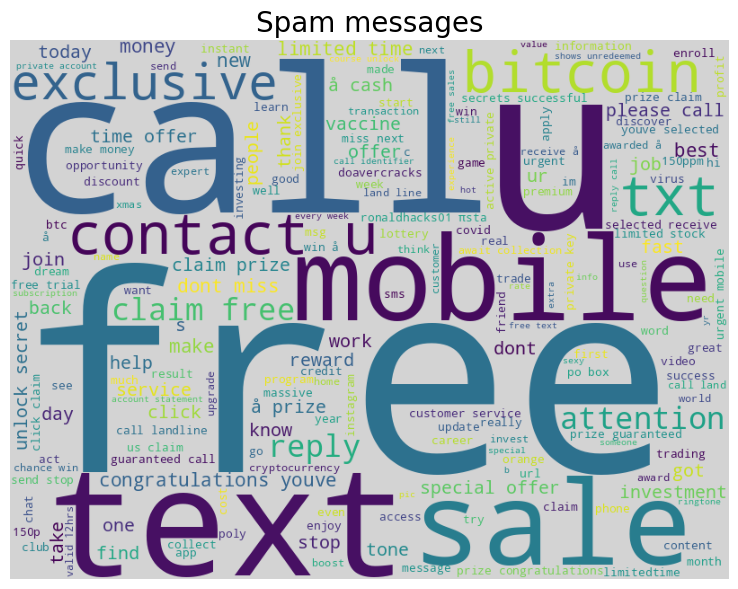

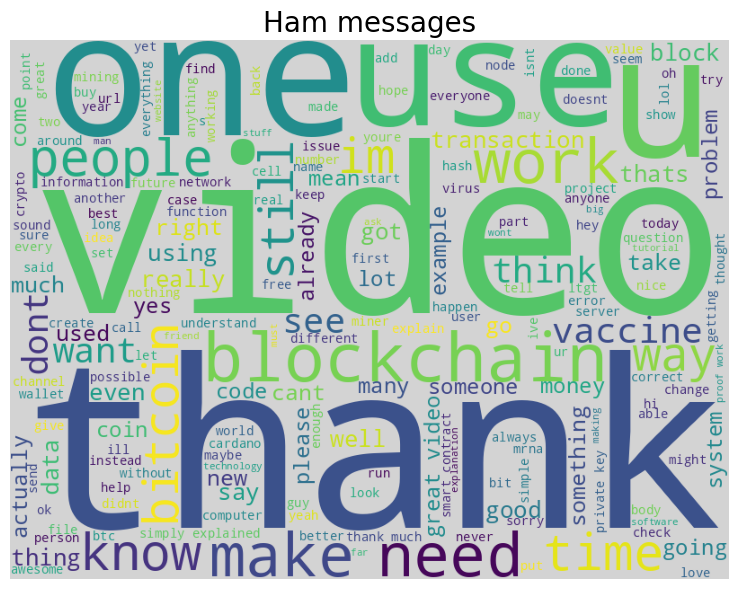

In [ ]:
data_ham  = data[data['Spam'] == 0].copy()
data_spam = data[data['Spam'] == 1].copy()

def show_wordcloud(df, title):
    text = ' '.join(df['Comment'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='lightgrey',
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=20 )
    plt.show()
show_wordcloud(data_spam, "Spam messages")
show_wordcloud(data_ham, "Ham messages")

In [12]:
# X = df['Comment'].values
# Y = df['Spam'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
# x= df["Comment"].to_list()
type(X_train)

<class 'pandas.core.frame.DataFrame'>
Index: 21635 entries, 0 to 21636
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  21635 non-null  object
 1   Spam     21635 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 507.1+ KB


In [119]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(x)


train_sequences = tokenizer.texts_to_sequences(x)
# test_sequences = tokenizer.texts_to_sequences(X_test)
# Pad the sequences to the same length
max_len = max(len(s) for s in train_sequences)
train_sequences = pad_sequences(train_sequences, maxlen=max_len)
# test_sequences = pad_sequences(test_sequences, maxlen=max_len)

print(train_sequences)

[[   0    0    0 ...   57  109  586]
 [   0    0    0 ... 3675 1755   45]
 [   0    0    0 ...  307 2634 1119]
 ...
 [   0    0    0 ...    0    0 1121]
 [   0    0    0 ...    0    0   77]
 [   0    0    0 ...    0    0  288]]


In [120]:
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(input_dim=5000, output_dim=128),
  tf.keras.layers.LSTM(64),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


2023-06-18 15:32:59.746464: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-18 15:32:59.749596: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-18 15:32:59.751934: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [10]:

model = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(model, input_shape=[], dtype=tf.string, trainable=True)

# nnlm_model = tf.saved_model.load("./models/nnlm-en-dim50_2")

model = tf.keras.Sequential([
    hub_layer,
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.build()
model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.binary_crossentropy, metrics=['accuracy'])
print(model.summary())

2023-07-01 16:14:26.726994: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-01 16:14:26.727708: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-07-01 16:14:28.279176: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'sen

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48190600  
                                                                 
 dense (Dense)               (None, 300)               15300     
                                                                 
 dense_1 (Dense)             (None, 150)               45150     
                                                                 
 dense_2 (Dense)             (None, 100)               15100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 48,266,251
Trainable params: 48,266,251
Non-trainable params: 0
_________________________________________________________________
None


In [53]:
# model = tf.keras.models.load_model('./trained-model.h5', custom_objects={'KerasLayer':hub.KerasLayer})

In [11]:

# fit the model
model.fit(X_train,
          y_train,
          epochs=20,
          batch_size=512,
          validation_data=(X_test, y_test),
          verbose=1,
          callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)]
)


# tf.saved_model.save(model, "fine_tuned")
model.save("models/trained-model.h5",include_optimizer=True)

Epoch 1/20


2023-07-01 16:15:33.701772: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall' with dtype float and shape [?,50]
	 [[{{node gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall}}]]
2023-07-01 16:15:33.701849: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall_3' with dtype int64 and shape [?]
	 [[{{node gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall_3}}]]


14/34 [===========>..................] - ETA: 16s - loss: 0.4940 - accuracy: 0.8383

KeyboardInterrupt: 

In [58]:
# model_prod = tf.keras.models.load_model('./trained-model.h5', custom_objects={'KerasLayer':hub.KerasLayer})
model.evaluate(X_test,y_test)

def convert_ml(msg_list):
    msg_list = list(map(lambda text: re.compile("\"").sub("", text), msg_list))
    msg_list = list(map(lambda text: re.compile(r"https?://\S+|www\.\S+").sub(r"[URL]", text), msg_list))
    msg_list = list(map(lambda text: text.translate(str.maketrans("", "", string.punctuation)), msg_list))
    msg_list = list(map(lambda text: " ".join([word.lower() for word in text.split() if word.lower() not in set(stopwords.words("english"))]), msg_list))
    msg_list = list(map(lambda text: text.lower(), msg_list))
    return msg_list

237/237 [==============================] - 22s 94ms/step - loss: 0.0593 - accuracy: 0.9841


In [73]:
sms = [
    # Seen before
    "That's nice, thanks for replying, you can send a message to my administrator on watsap to earn in crypto especially Bitcoin ...1..6.1..3..6.0..4..5..7..4..7 He's excellent at what he does, tell him referred you to him. His passionate strategies are top notch the ✌️🇺🇸",
    
    # New spam
    "I'm so happy I met RM_KESH01 on Insta he help me recover my lost Erc20 sent to a wrong network I'm so happy because his trusted and reliable",
    "This is wonderful and unbelievable just got my Bitcoin account back through Doavercracks on ig thanks a lot really appreciate it.",
    "I recommend y'all to Doavercracks on IG.",
    "BTC price to volatiles swing, making it historically popular for traders to speculate on. According to bitcoin having cycles, there should be at least other four months in this bull run, so, if the Pi indicator (and bitcoin) might repeat a similar bull run to 2013,that would mean a local top relatively close in time and then another top to end the bull run towards mid year, investor's and trader's find it difficult to decide how best to utilize the current market, holding is profitable but trading is far more profitable, I was able to grasp knowledge of trading crypto assets earlier enough, I didn't think it was possible to make constant win from trading till I come across Mrs milly program for investor's and newbies who lack understanding on how trading BTC works, to help them stack up more bitcoin, since late last year till date I have made over 19BTC from 2.6BTC with Mrs milly's help, you can easily get to her with this WhatsApp number +1-2-1-0-8-0-6-4-8-8-9",
    "Never thought it was possible to recover my lost btc until I meet victoolz on insta who helped me...",
    "Can't recommend him enough for his tireless effort and tremendous job done Doavercracks on IG his truly the best 💯💯",
    "Good channel in teleg TAKEPROFITPLAN . Lots of cool ideas for free. Check ...",
    
    # Not spam
    "Amazing video!",
    "Maybe to make proof of stake system more democraric we can think about share a certain amount of money the validator get to all the other validators?",
    "I don't get it 😅😂",
    
    # Made up spam (definitely not seen before)
    "Xavier is wonderful, I traded with him and made huge profits",
    "Contact Mr. Decuyper for advice"

]
# convert_ml(sms)
import emoji
import re
import unicodedata

import re
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

# print()


model.evaluate(convert_ml(list(map(remove_emoji, sms))),[1,1,1,1,1,1,1,1,0,0,0,1,1])
# for test in sms:
#     out = model.predict(convert_ml([test]))
#     print("%s - %f - %s" % ("Spam" if out[0] > 0.5 else "HAM", out[0], test))
#     print()

1/1 [==============================] - 3s 3s/step - loss: 4.1284 - accuracy: 0.5385


[4.128388404846191, 0.5384615659713745]

In [ ]:
model_prod = tf.keras.models.load_model('models/trained-model.h5', custom_objects={'KerasLayer':hub.KerasLayer})
text = input("text")

out = model_prod.predict([text]) > 0.9
print("%s - %f - %s" % ("Spam" if out[0] > 0.5 else "not spam", out[0], text))


user = int(input("is coorect"))

if not user :
    print("d")
    model.fit([text],
            [not out],
            epochs=2,
            batch_size=512,
            # validation_data=(X_test, y_test),
            verbose=1,
            # callbacks=[early_stop]
    )
    
    model.save("trained-model.h5")

2023-06-14 20:18:06.739322: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 192762400 exceeds 10% of free system memory.
2023-06-14 20:18:07.561462: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'sentences' with dtype string and shape [?]
	 [[{{node sentences}}]]
2023-06-14 20:18:07.573525: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder' with dtype string and shape [?]
	 [[{{node Placeholder}}]]
2023-06-14 20:18:12.823772: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 192762400 exceeds 10% of free system memory.


1/1 [==============================] - 0s 120ms/step
not spam - 0.000000 -      Congratulations! You've won a free iPhone!     Your account has been suspended. Please click here to verify your identity.     Your package has been delivered. Click here to track your shipment.     You have a new voicemail. Click here to listen.     You've been selected to receive a free gift! Click here to claim your prize.     Your credit card has been declined. Please call us to update your billing information.     Your bank account has been frozen. Please contact us immediately.     You're about to win a million dollars! Click here to claim your prize.     Your car's warranty is about to expire. Click here to renew your coverage.     You've been exposed to a virus. Click here to download our antivirus software.


KeyboardInterrupt: Interrupted by user

# https://www.kaggle.com/code/ishansoni/sms-spam-collection-dataset
## https://www.kaggle.com/code/dejavu23/sms-spam-or-ham-beginner
# https://www.kaggle.com/code/mfaisalqureshi/email-spam-detection-98-accuracy
https://github.com/30lm32/ml-spam-sms-classification

''

In [ ]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
import tensorflow_hub as hub
import tensorflow as tf


model = Model(inputs=input1, outputs=outputs)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["AUC"])

tf.saved_model.save(loaded_obj, "fine_tuned")
model.save("model.h5", include_optimizer=False)




model = Model(inputs=input1, outputs=outputs)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["AUC"])

tf.saved_model.save(loaded_obj, "fine_tuned")
model.save("model", include_optimizer=False)
